<h1>Baseline for Problem Set 2</h1>
<p>The following notebook is a simple baseline (a lot of room for improvements) which can help guide you throughout the process of making a Convolutional Neural Network (CNN) for detecting features of a celebrity.</p>

## Prerequisites and Useful Links

While this notebook would attempt to explain CNNs in a easy-to-understand way, it is helpful if the reader has an understanding of how Neural Networks work. This video series by Stat Quest: https://bit.ly/3fXkbNA goes into great detail about Neural Networks. Additionally, refer to the https://www.tisbmlthon.com/resources web-page for helpful starter resources. Finally, the documentation of each library used here (tensorflow.keras, pandas and to a lesser extent sklearn, matplotlib and seaborn) is also helpful for knowing the specifics of how a function work, but this notebook shall attempt to explain unfamiliar functions.

<h2>Content</h2>
<p>Overall, there are 202,000 images of celebrities (approximately 171,000 for training and 30,000 for testing) with 2 attributes labelled: <b>thick-nose-and-lips</b> and <b>wearing-accessories</b>.</p>
<p>Data Files:</p>
<ol>
  <li><b>images.zip:</b> All 202,000 face images</li>
  <li><b>face_attribute_train:</b> Attribute labels for our face images. 1 signifies true while 0 signifies false</li>
  <li><b>Sample Submissions:</b> Contains image data for testing purposes</li>
</ol>  


In [ ]:
# Importing Libraries

#Managing Data 
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import *
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam



In [ ]:
%matplotlib inline
plt.style.use('ggplot')

 <h2>Data Exploration</h2>  
 <p> Here we explore the dataset given to us.</p>


In [ ]:
#define variables
img_folder = 'face_images'

#import the dataset with the attributes
df_attr = pd.read_csv('face_attribute_train.csv')
df_attr.head()

,image_id,Wearing_Accessories,Thick_Lips_Nose
0,108829970.jpg,0,1
1,116516170.jpg,0,0
2,120840350.jpg,1,0
3,109640690.jpg,0,1
4,115812100.jpg,0,0


Note that it is very important for you to be able to access your files easily. Since all my files were in the root directory, I had to only define the location of the image folders, however you may need to define the main folder where all the files (face_attribute_train.csv, images folder and sampleSubmission.csv)  are stored.

In [ ]:
df_attr

,image_id,Wearing_Accessories,Thick_Lips_Nose
0,108829970.jpg,0,1
1,116516170.jpg,0,0
2,120840350.jpg,1,0
3,109640690.jpg,0,1
4,115812100.jpg,0,0
...,...,...,...
172194,88978190.jpg,1,0
172195,91592580.jpg,0,0
172196,122054470.jpg,1,1
172197,120988830.jpg,0,0


As&nbsp;you&nbsp;can&nbsp;note,&nbsp;we&nbsp;have&nbsp;172199&nbsp;rows,&nbsp;and&nbsp;thus,&nbsp;172199&nbsp;images.

## Data Visualization

Here we will plot the distribution of all the attributes in the dataset. As mentioned before, our primary goal is to identify celebrity features. As a result, we need to be aware of the distribution of the data for our next steps

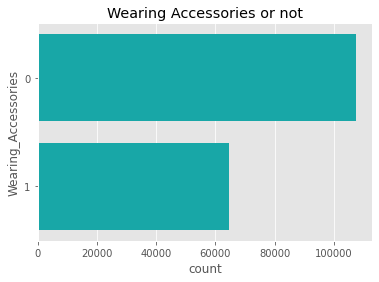

In [ ]:
#Wearing Accessories or not?
plt.title('Wearing Accessories or not')
sns.countplot(y='Wearing_Accessories', data=df_attr, color="c")
plt.show()

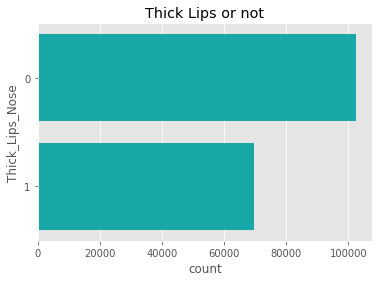

In [ ]:
#Thick or thin lips and nose?
plt.title('Thick Lips or not')
sns.countplot(y='Thick_Lips_Nose', data=df_attr, color="c")
plt.show()

## Splitting the Dataset into Test and Validation 

We split our data into 75% test data and 25% validation data, although other splits may be explored. It is important that we have validation data so that we can tune our hyperparameter values.

In [ ]:
#Loading train and validation dataset using the recommended partition
train_df, val_df = train_test_split(df_attr, test_size = 0.25)

In [ ]:
train_df.head()

,image_id,Wearing_Accessories,Thick_Lips_Nose
117340,99640650.jpg,0,1
46100,88546650.jpg,0,1
36237,118783250.jpg,0,0
114540,89744910.jpg,0,0
142226,118190190.jpg,0,1


In [ ]:
val_df.head()

,image_id,Wearing_Accessories,Thick_Lips_Nose
63243,121408300.jpg,0,0
110390,110485380.jpg,0,0
74947,113073270.jpg,0,1
24006,120111890.jpg,1,0
19598,113731920.jpg,1,0


## Building Data Generators

Because of the amount of images we would load into memory, it would be best to create a helper object called a Data Generator. It essentially generates batches of data, which will be used to feed our multi-output model with both the images and their labels. This step is also done instead of just loading all the dataset into the memory at once, which is memory intensive and could lead to an out of memory error.

In [ ]:
#Generate image generator
datagen=ImageDataGenerator(rescale=1./255.)

#Define the target columns for our generator
columns = ['Wearing_Accessories', 'Thick_Lips_Nose']

#Generate train generator
train_generator =     datagen.flow_from_dataframe(train_df, 
                                                    img_folder, 
                                                    x_col = 'image_id', 
                                                    y_col = columns, 
                                                    class_mode='raw',
                                                    target_size=(218, 178), 
                                                    batch_size = 20, 
                                                    color_mode = 'rgb', 
                                                    shuffle = True)

#Generate validation generator
val_generator =   datagen.flow_from_dataframe(val_df, 
                                                    img_folder, 
                                                    x_col = 'image_id', 
                                                    y_col = columns, 
                                                    target_size =(218, 178), 
                                                    class_mode = 'raw', 
                                                    batch_size = 20, 
                                                    color_mode = 'rgb', 
                                                    shuffle = True)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 84880 invalid image filename(s) in x_col="image_id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 44269 validated image filenames.
Found 14710 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 28340 invalid image filename(s) in x_col="image_id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
#Define shape of input; this is image height, image width, channels (color)
                                                     # 3 channels means RGB
input_shapes = (218, 178, 3)

#Define input for the model
model_input = Input(shape=input_shapes)

## Building the Model

We finally build the CNN in this step. For this particular model, we are basing our final model on VGG16 (also known as OxfordNet). It is a powerful neural network which is easy to implement. This is also known as transfer learning as we are re-using a different model developed for a task as a base model. We shall add our own new top layers as the original top layers contain information specific to a dataset (in this case, VGG16's top layers are specific to the ImageNet dataset). The non top-layers have recognized generic information and, as such, can be reused. 

In [ ]:
#defining our base model
base_model = VGG16(weights=None, include_top=False, input_shape=input_shapes, input_tensor=model_input)

#printing the number of layers
print("number of layers:", len(base_model.layers))

number of layers: 19


### VGG16 Structure

![VGG16 Structure](image-20210410-011922.png)


Source: Geeksforgeeks.org 

This is the structure of the VGG16 model, developed over the imagenet dataset. The top layers would not be included in our model. These layers will be replaced for custom top layers.

In [ ]:
#model summary
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 218, 178, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 218, 178, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 218, 178, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 109, 89, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 109, 89, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 109, 89, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 54, 44, 128)       0     

In [ ]:
#Creating our own custom layers
x = base_model.output
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

In [ ]:
#defining our new, final model
model = Model(inputs=model_input, outputs = predictions, name='model')

In [ ]:
#build an optimizer for our model
init_lr = 1e-4
epochs = 100
opt = Adam(lr=init_lr, decay=init_lr / epochs)

#compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [ ]:
#final model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 218, 178, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 218, 178, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 218, 178, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 109, 89, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 109, 89, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 109, 89, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 54, 44, 128)       0     

In [ ]:
#Generate number of steps per epoch
EPOCH_STEPS_TRAIN = train_generator.samples//train_generator.batch_size
EPOCH_STEPS_VAL = val_generator.samples//val_generator.batch_size

In [ ]:
#Generate a callback to store model weights
#verbose = 1 provides us more information
#save_only_best saves the best model
callbacks = [
    ModelCheckpoint("./model_checkpoint", monitor='val_loss', verbose=1, save_best_only=True)
]
history = model.fit(
    train_generator, 
    steps_per_epoch = EPOCH_STEPS_TRAIN, 
    epochs = 10, 
    validation_data = val_generator, 
    validation_steps = EPOCH_STEPS_VAL)

Epoch 1/10
2213/2213 [==============================] - 2302s 1s/step - loss: 0.6630 - accuracy: 0.4042 - mse: 0.2505 - val_loss: 0.6345 - val_accuracy: 0.3937 - val_mse: 0.2477
Epoch 2/10
2213/2213 [==============================] - 615s 278ms/step - loss: 0.6265 - accuracy: 0.3986 - mse: 0.2500 - val_loss: 0.6114 - val_accuracy: 0.4421 - val_mse: 0.2477
Epoch 3/10
2213/2213 [==============================] - 617s 279ms/step - loss: 0.6015 - accuracy: 0.4611 - mse: 0.2512 - val_loss: 0.5800 - val_accuracy: 0.5204 - val_mse: 0.2585
Epoch 4/10
2213/2213 [==============================] - 618s 279ms/step - loss: 0.5708 - accuracy: 0.5153 - mse: 0.2528 - val_loss: 0.5677 - val_accuracy: 0.4886 - val_mse: 0.2571
Epoch 5/10
2213/2213 [==============================] - 618s 279ms/step - loss: 0.5502 - accuracy: 0.5426 - mse: 0.2513 - val_loss: 0.5428 - val_accuracy: 0.5448 - val_mse: 0.2474
Epoch 6/10
2213/2213 [==============================] - 619s 280ms/step - loss: 0.5348 - accuracy: 0.5

As you can see, the log loss for the train data and validation data is 0.45 and 0.55 respectively while the accuracy for the train data and the validation data is 0.58 and 0.53 respectively. The smaller the log loss, the better the model and the higher the accuracy, the better the model.

In [ ]:
#Modelling the Loss 
plt.figure(figsize=(18, 4))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.title('Loss Function')
plt.show()

In [ ]:
#Modelling the Accuracy
plt.figure(figsize=(18, 4))
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.title('Accuracy')
plt.show()

## Evaluating the Model

In [ ]:
#load the best model
model.load_weights('./model_checkpoint')

In [ ]:
#loading test data
test_df = pd.read_csv('sampleSubmission.csv')

#reading the number of rows in test_df
test_samples = len(test_df.index)

#defining number of steps for model evaluation
EPOCH_STEPS_TEST = test_samples // 128

test_df

In [ ]:
#Generate test generator
test_generator =     datagen.flow_from_dataframe(test_df, 
                                                    img_folder, 
                                                    x_col = 'image_id', 
                                                    y_col = columns, 
                                                    class_mode='raw',
                                                    target_size=(218, 178), 
                                                    batch_size = 128, 
                                                    color_mode = 'rgb', 
                                                    shuffle = True)

In [ ]:
#Evaluating the model
scores = model.evaluate(generator=test_generator(), steps=EPOCH_STEPS_TEST)
print(scores)

## Limitations and Going Forward

<ol>
    <li>Due to limitations in file memory, not all the images were validated. This should not be an issue in your attempts.</li>
    <li>Data augmentation was not used either due to the aforementioned memory limitations. It may be helpful to augment the images so that the model would encounter new forms of images and thus be more robust. Some augmentations could include increasing the "depth" of the subject or distorting the image.</li>
    <li>Tuning hyperparameters may result in improvements in the model</li>
    <li>Try using different models and layers for both the base model (such as Inception v3) and the top layers</li>


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=66e592bb-e680-4a54-85f5-468563575650' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>